In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt

In [2]:
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)
z = im_channels.reshape((-1, 3))
z = np.float32(z)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = 2
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [3]:
im_channels.dtype

dtype('uint8')

In [4]:
label

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [5]:
z.shape

(8838000, 3)

In [6]:
label.shape

(8838000, 1)

In [7]:
label.reshape(im_channels.shape[:2])

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [8]:
max(label)

array([1], dtype=int32)

In [9]:
label.flatten()

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [10]:
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape(im_channels.shape)

In [11]:
res.shape

(8838000, 3)

In [12]:
res2.shape

(2946, 3000, 3)

In [13]:
im_channels.shape

(2946, 3000, 3)

In [14]:
v2d = label.reshape(im_channels.shape[:2])

In [15]:
v2d.shape

(2946, 3000)

In [16]:
ret

22860005092.538338

In [17]:
ar = np.where(v2d == 0)

In [18]:
print(max(ar[0]), min(ar[0]))

2945 0


In [19]:
print(max(ar[1]), min(ar[1]))

2999 0


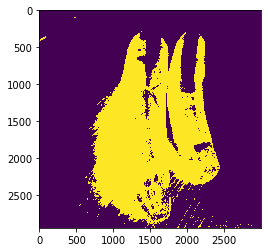

In [20]:
fig = plt.figure()
plt.imshow(v2d)
plt.show()

In [21]:
def erosion(img, kernel_size, iterations):
	kernel = np.ones((kernel_size, kernel_size), np.uint8)
	erosion = cv2.erode(img, kernel, iterations=iterations)
	return erosion

In [22]:
v2d2 = np.uint8(v2d)
print(v2d2.shape)
print(v2d2.dtype)

(2946, 3000)
uint8


In [23]:
print(im_channels[:,:,2].shape)
print(im_channels[:,:,2].dtype)

(2946, 3000)
uint8


In [24]:
v2d2_eroded = erosion(v2d2, 25, 1)

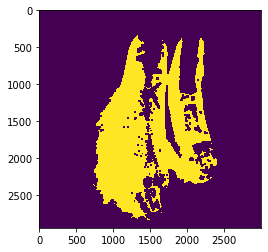

In [25]:
fig = plt.figure()
plt.imshow(v2d2_eroded)
plt.show()

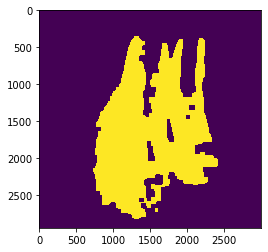

In [26]:
kernel_size = 50
kernel = np.ones((kernel_size, kernel_size), np.uint8)
v2d2_oc = cv2.morphologyEx(v2d2, cv2.MORPH_OPEN, kernel)
v2d2_oc = cv2.morphologyEx(v2d2_oc, cv2.MORPH_CLOSE, kernel)
fig = plt.figure()
plt.imshow(v2d2_oc)
plt.show()

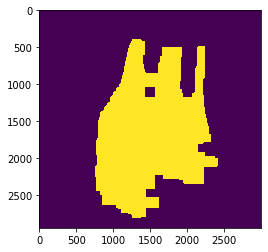

In [27]:
kernel_size = 100
kernel = np.ones((kernel_size, kernel_size), np.uint8)
v2d2_co = cv2.morphologyEx(v2d2_oc, cv2.MORPH_CLOSE, kernel)
v2d2_co = cv2.morphologyEx(v2d2_co, cv2.MORPH_OPEN, kernel)
fig = plt.figure()
plt.imshow(v2d2_co)
plt.show()

In [28]:
v2d2_oc[2000, 1000]

1

In [29]:
label.shape

(8838000, 1)

In [30]:
indices = np.nonzero(v2d == 1)

In [31]:
len(indices[0])

2686756

In [32]:
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(v2d2_co)

In [33]:
nlabels

2

In [34]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [35]:
stats

array([[      0,       0,    3000,    2946, 6339329],
       [    758,     389,    1657,    2420, 2498671]], dtype=int32)

In [36]:
centroids

array([[1493.0480371 , 1403.78822711],
       [1515.86914804, 1646.82728619]])

In [37]:
stats[:, cv2.CC_STAT_AREA]

array([6339329, 2498671], dtype=int32)

In [38]:
area_order = np.sort(stats[:, cv2.CC_STAT_AREA])

In [39]:
area_order[-2]

2498671

In [40]:
area_value_kernel = np.sort(stats[:, cv2.CC_STAT_AREA])[-2]
print(area_value_kernel)

2498671


In [41]:
stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :]

array([[[    758,     389,    1657,    2420, 2498671]]], dtype=int32)

In [42]:
stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :].flatten()

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [43]:
bb = stats[np.where(stats[:, cv2.CC_STAT_AREA] == area_value_kernel), :].flatten()

In [44]:
tuple(bb[[cv2.CC_STAT_LEFT, cv2.CC_STAT_TOP]])

(758, 389)

In [45]:
bb.reshape(5)

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [46]:
bb.flatten()

array([    758,     389,    1657,    2420, 2498671], dtype=int32)

In [47]:
bb[[cv2.CC_STAT_LEFT, cv2.CC_STAT_TOP]] + bb[[cv2.CC_STAT_WIDTH, cv2.CC_STAT_HEIGHT]]

array([2415, 2809], dtype=int32)

## Peak

In [48]:
import cv2
import numpy as np
# Read image
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# Resize image
image = cv2.resize(image, (224, 224))
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)

In [49]:
def hist3d(img, intervals):
	space = np.linspace(0, 1, intervals+1)
	h3d = np.zeros((intervals, intervals, intervals))
	for n in range(img.shape[0]):
		for m in range(img.shape[1]):
			tmpVal1 = img[n, m, 0]
			tmpVal2 = img[n, m, 1]
			tmpVal3 = img[n, m, 2]
			idxVal1 = 0
			idxVal2 = 0
			idxVal3 = 0
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal1 >= space[i]) and (tmpVal1 <= space[i+1])):
						idxVal1 = i
						break
				else:
					if ((tmpVal1 >= space[i]) and (tmpVal1 < space[i+1])):
						idxVal1 = i
						break
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal2 >= space[i]) and (tmpVal2 <= space[i+1])):
						idxVal2 = i
						break
				else:
					if ((tmpVal2 >= space[i]) and (tmpVal2 < space[i+1])):
						idxVal2 = i
						break
			for i in range(intervals):
				if i == intervals:
					if ((tmpVal3 >= space[i]) and (tmpVal3 <= space[i+1])):
						idxVal3 = i
						break
				else:
					if ((tmpVal3 >= space[i]) and (tmpVal3 < space[i+1])):
						idxVal3 = i
						break
			h3d[idxVal1, idxVal2, idxVal3] = h3d[idxVal1, idxVal2, idxVal3] + 1
	return h3d

In [50]:
def normalizeHSV(rawHSV):
	# For HSV, Hue range is [0,179], Saturation range is [0,255] and Value range is [0,255].
	normalized = np.empty(rawHSV.shape)
	normalized[:, :, 0] = rawHSV[:, :, 0]/179.0
	normalized[:, :, 1] = rawHSV[:, :, 1]/255.0
	normalized[:, :, 2] = rawHSV[:, :, 2]/255.0
	return normalized

In [51]:
def findPeak4D(h3d, width):
    peaks = np.empty((0,4),int)
    for i in range(width,h3d.shape[0]-width):
        for j in range(width,h3d.shape[1]-width):
            for k in range(width,h3d.shape[2]-width):
                pattern = h3d[i-width:i+width+1,j-width:j+width+1,k-width:k+width+1]
                val = 6*pattern[1,1,1] - pattern[1,1,0] - pattern[1,1,2] - pattern[0,1,1] - pattern[1,0,1] -pattern[1,2,1] - pattern[2,1,1]
                # Afegir que el valor maxim sigui al pla mitj
                if val>0:
                    peaks = np.vstack((peaks,[i,j,k,val]))
    return peaks

In [52]:
im_norm = normalizeHSV(im_channels)

In [53]:
h3d = hist3d(im_norm, 15)

In [54]:
h3d.shape

(15, 15, 15)

In [55]:
p4d = findPeak4D(h3d, 5)

In [56]:
p4d.shape

(28, 4)

In [57]:
print(p4d)

[[  5.   5.   8. 128.]
 [  5.   5.   9.   9.]
 [  5.   6.   7.  24.]
 [  5.   7.   7.   6.]
 [  5.   7.   8.  12.]
 [  5.   8.   5.  58.]
 [  5.   8.   8.   3.]
 [  5.   9.   7.   3.]
 [  5.   9.   9.  98.]
 [  6.   5.   8.  68.]
 [  6.   5.   9.  18.]
 [  6.   6.   7.   3.]
 [  6.   8.   6.   4.]
 [  6.   8.   7.   2.]
 [  6.   9.   7.   4.]
 [  7.   6.   7.   9.]
 [  7.   7.   6.   4.]
 [  7.   8.   6.   4.]
 [  8.   6.   9.  12.]
 [  8.   7.   6.   5.]
 [  8.   7.   8.   3.]
 [  8.   7.   9.  26.]
 [  8.   8.   8.   5.]
 [  8.   8.   9.  27.]
 [  8.   9.   9.  26.]
 [  9.   6.   9.   6.]
 [  9.   7.   9.  38.]
 [  9.   8.   8.   6.]]


In [58]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
k = len(p4d)
# Sort every channel in a single column
z = im_channels.reshape((-1, 3))
# convert to np.float32
z = np.float32(z)
ret, label, center = cv2.kmeans(z, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [59]:
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]

In [60]:
res2 = res.reshape(im_channels.shape)

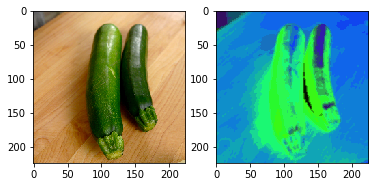

In [61]:
import matplotlib.pyplot as plt
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax2.imshow(res2)
plt.show()

In [62]:
label.shape

(50176, 1)

In [63]:
z[label.flatten() == 0].mean(axis=0)

array([ 40.772583, 249.62427 ,  45.411236], dtype=float32)

In [64]:
z[label.flatten() == 0,0].mean()

40.772583

In [65]:
sensitivity = 20
lower_green = np.array([60 - sensitivity,100,100])
upper_green = np.array([60 + sensitivity,255,255])
cluster_mean = np.ndarray((k, 3))
for i in range(k):
    cluster_mean[i] = z[label.flatten() == i].mean(axis=0)
# mask = cv2.inRange(cluster_mean, lower_green, upper_green)
# plt.imshow(mask)
# plt.show()

In [66]:
def in_range(clusters, lower, upper):
	res = np.logical_and(np.logical_and(lower[0] <= clusters[:, 0],  clusters[:, 0] <= upper[0]),
						 np.logical_and(lower[1] <= clusters[:, 1],  clusters[:, 1] <= upper[1]),
						 np.logical_and(lower[2] <= clusters[:, 2],  clusters[:, 2] <= upper[2]))
	return res

In [67]:
green_clus = in_range(cluster_mean, lower_green, upper_green)

In [68]:
cluster_mean

array([[ 40.77258301, 249.62426758,  45.41123581],
       [ 41.046875  , 216.105896  ,  98.89583588],
       [ 25.01668358, 217.87382507, 147.42909241],
       [ 39.37172699, 174.42932129,  15.14659691],
       [ 45.69804764, 179.22203064,  76.61101532],
       [ 16.79715919, 165.53947449, 182.36108398],
       [ 15.65199566, 143.99378967, 202.80020142],
       [ 27.23248291, 248.9052124 , 115.57414246],
       [ 57.44332123, 248.55378723,  22.04548645],
       [ 44.62963104, 141.52909851,  82.46031952],
       [ 52.54707336,  16.22646332,  97.76589966],
       [ 16.63333893, 101.38811493, 234.75332642],
       [ 38.59417725, 181.73117065, 121.39726257],
       [ 46.13265228,  92.65816498,  99.40816498],
       [ 43.59589005, 128.15068054,  98.04109955],
       [ 42.30252075,  55.94677734, 120.65546417],
       [ 15.93497944, 126.05471802, 215.50196838],
       [ 43.87943649, 248.00663757,  81.93048859],
       [ 33.79807663, 125.46154022, 120.6442337 ],
       [  4.47115374,  17.625  

In [69]:
green_clus

array([ True,  True, False, False,  True, False, False, False,  True,
        True, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False])

In [70]:
idx = np.nonzero(green_clus)

In [71]:
idx

(array([ 0,  1,  4,  8,  9, 14, 17], dtype=int64),)

In [72]:
label.flatten()

array([10, 10, 10, ..., 25, 25, 25], dtype=int32)

In [73]:
mask = np.isin(label.flatten(), idx)

In [74]:
bin_im = mask.reshape((224, 224))

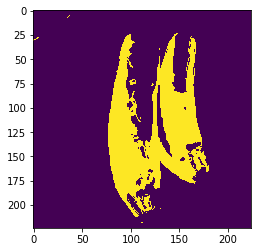

In [75]:
plt.imshow(bin_im)
plt.show()

### Peak choosing

In [110]:
import cv2
import numpy as np
image = cv2.imread(r'C:\Users\salgueir\Pictures/zucchini.jpg')
# image = cv2.imread(img_path)
# Resize image
image = cv2.resize(image, (224,224))
# Convert Image to HSV color space
im_channels = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# Apply Gaussian blur
im_channels = cv2.GaussianBlur(im_channels, (5, 5), 0)

im_norm = normalizeHSV(im_channels)
h3d = hist3d(im_norm, 25)
p4d = findPeak4D(h3d, 5)

In [111]:
max(p4d[:,3])

571.0

In [112]:
peaks3d = p4d
count = 0
peaks = peaks3d[peaks3d[:, 3].argsort()[::-1]]
print(peaks[:,:10])
clustThresh = 50
peakMask = np.ones(peaks.shape[0], dtype=bool)
oldMask = peakMask

[[  6.  11.  14. 571.]
 [ 10.   7.  17. 219.]
 [  6.  10.  15. 199.]
 ...
 [  8.   7.  11.   1.]
 [ 10.  13.  17.   1.]
 [  6.  13.  13.   1.]]


In [113]:
while True:
    if count == 0:
        peakMask = np.ones(peaks.shape[0], dtype=bool)
    else:
        peakMask = np.bitwise_or(np.bitwise_or(peaks[:, 0]  > (coords[0] + 1), peaks[:, 0] < (coords[0] - 1)),
                                np.bitwise_or(peaks[:, 1]  > (coords[1] + 1), peaks[:, 1] < (coords[1] - 1)),
                                np.bitwise_or(peaks[:, 2]  > (coords[2] + 1), peaks[:, 2] < (coords[2] - 1)))
        peakMask = np.bitwise_and(peakMask, oldMask)
    newpeaks = peaks[peakMask, :]
    clustVal = newpeaks[:,3].max()
    if clustVal < clustThresh:
        break
    coords = newpeaks[0, :3] #s i el primer es el mes alt...
    print('coords')
    print(coords)
    if count == 0:
        clustCoords = coords
    else:
        clustCoords = np.vstack((clustCoords, coords))
    oldMask = peakMask
    oldClustVal = clustVal
    count += 1

coords
[ 6. 11. 14.]
coords
[10.  7. 17.]
coords
[10. 10. 15.]
coords
[10. 19. 11.]
coords
[10. 12. 14.]
coords
[ 9. 17. 12.]
coords
[ 8.  5. 14.]
coords
[ 6. 14. 12.]
coords
[ 9. 15. 13.]


In [103]:
pMask = np.bitwise_and(np.bitwise_or(peaks[:, 0]  > (coords[0] + 1), peaks[:, 0] < (coords[0] - 1)),
np.bitwise_or(peaks[:, 1]  > (coords[1] + 1), peaks[:, 1] < (coords[1] - 1)),
np.bitwise_or(peaks[:, 2]  > (coords[2] + 1), peaks[:, 2] < (coords[2] - 1)))

pMask = np.bitwise_and(pMask, oMask)
print(pMask)

[False  True False False  True  True  True  True  True False False  True
  True  True  True  True False  True  True  True  True  True  True  True
 False False  True  True False  True  True False  True False  True  True
 False False False  True False  True False False  True  True  True  True
  True  True False  True False False  True  True False  True  True  True
  True  True False False False False False False False  True False False
  True False  True False  True False  True False  True  True  True False
  True  True False False  True False  True False False False False  True
  True False False  True  True False  True  True False  True  True  True
  True False False  True  True False  True  True False  True  True False
  True  True  True False  True  True False False  True  True  True False
 False  True  True  True False  True  True False  True False False False
  True False  True  True  True  True False False  True False False False
 False False False  True  True False  True False Fa

In [101]:
newpeaks = peaks[pMask, :]
clustVal = newpeaks[:,3].max()
print(clustVal, clustThresh)
coords = newpeaks[0, :3] #s i el primer es el mes alt...
print('coords')
print(coords)

571.0 50
coords
[ 6. 11. 14.]


In [102]:
oMask = pMask
print(oMask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

In [87]:
peaks[:10,:]

array([[  6.,  11.,  14., 571.],
       [ 10.,   7.,  17., 219.],
       [  6.,  10.,  15., 199.],
       [ 10.,  10.,  15., 196.],
       [ 10.,   9.,  16., 185.],
       [ 10.,   8.,  16., 176.],
       [ 10.,  19.,  11., 121.],
       [ 10.,   7.,  18., 121.],
       [ 10.,  19.,  12., 110.],
       [ 10.,  12.,  14., 106.]])

In [107]:
np.bitwise_or(peaks[3, 0]  > (coords[0] + 1), peaks[3, 0] < (coords[0] - 1))

True

In [114]:
clustVal

41.0

In [109]:
print (peaks[3, 0], coords[0])
print (peaks[3, 1], coords[1])
print (peaks[3, 2], coords[2])

10.0 6.0
10.0 11.0
15.0 14.0
